In [1]:
import ase
from ase.io import write
import matplotlib.pyplot as plt
import abtem

(examples:4dstem_quickstart)=
# 4D-STEM quickstart

In [2]:
abtem.config.set({"device": "cpu"})
abtem.config.set({"fft": "mkl"})

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>)

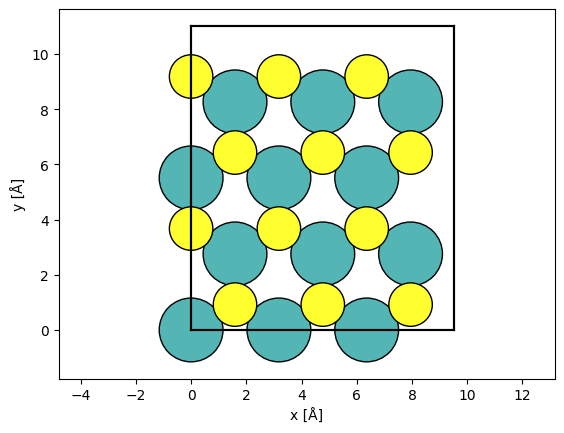

In [3]:
atoms = ase.build.mx2(vacuum=2)

atoms = abtem.orthogonalize_cell(atoms)

atoms *= (3,2,1)

abtem.show_atoms(atoms)

In [4]:
potential = abtem.Potential(atoms, sampling=0.05)

probe = abtem.Probe(energy=80e3, semiangle_cutoff=30)
probe.grid.match(potential)

In [19]:
grid_scan = abtem.GridScan.from_fractional_coordinates(
    potential, start=[0, 0], end=[1 / 3, 1 / 2], sampling=probe.aperture.nyquist_sampling
)

In [20]:
detector = abtem.PixelatedDetector()

measurements = probe.scan(potential, scan=grid_scan, detectors=detector)
measurements.array

dask.array<mean_agg-aggregate, shape=(10, 16, 89, 89), dtype=float32, chunksize=(10, 16, 89, 89), chunktype=numpy.ndarray>

In [21]:
measurements.compute()

[########################################] | 100% Completed | 2.38 sms


In [ ]:
measurements

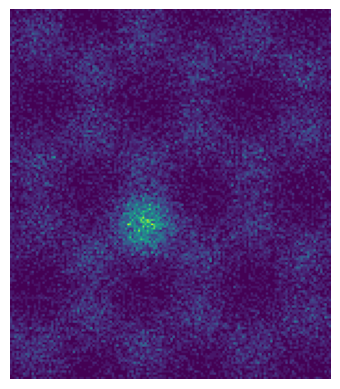

In [64]:
fig, ax = noisy_measurement.show()
ax.axis("off")
plt.savefig("../thumbnails/stem_quickstart.png", bbox_inches="tight", pad_inches=0)